In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import tree
plt.rcParams["figure.figsize"] = (30,10)
plt.figure(dpi=2400)

<Figure size 72000x24000 with 0 Axes>

<Figure size 72000x24000 with 0 Axes>

In [2]:
dataset1 = pd.read_csv("../data/preprocessed-data/dataset1.csv")
y_dataset1 = np.array(dataset1['Biopsy'])
dataset1 = dataset1.drop(columns=['Unnamed: 0', 'Biopsy'], axis=1)
dataset1




,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0.0,0,1,0,1,0,0,0,0
3,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
4,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
826,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
827,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,0,0,0,0,0,0,1
828,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [3]:
dataset2 = pd.read_csv("../data/preprocessed-data/fetal.csv")
y_dataset2 = np.array(dataset2['fetal_health'])
dataset2 = dataset2.drop(columns=['Unnamed: 0', 'fetal_health'], axis=1)
dataset2


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,132,0.006,0.000,0.006,0.003,0.0,0.000,17,2.1,0,...,130,68,198,6,1,141,136,140,12,0
1,133,0.003,0.000,0.008,0.003,0.0,0.000,16,2.1,0,...,130,68,198,5,1,141,135,138,13,0
2,134,0.003,0.000,0.008,0.003,0.0,0.000,16,2.4,0,...,117,53,170,11,0,137,134,137,13,1
3,132,0.007,0.000,0.008,0.000,0.0,0.000,16,2.4,0,...,117,53,170,9,0,137,136,138,11,1
4,131,0.005,0.072,0.008,0.003,0.0,0.000,28,1.4,0,...,66,88,154,5,0,135,134,137,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,128,0.000,0.002,0.007,0.005,0.0,0.002,65,2.6,0,...,129,63,192,6,0,103,92,114,28,0
2109,128,0.000,0.002,0.007,0.005,0.0,0.002,66,2.7,0,...,129,63,192,4,0,105,89,112,21,0
2110,128,0.000,0.002,0.007,0.006,0.0,0.002,65,2.5,0,...,129,63,192,6,0,104,94,115,28,0
2111,128,0.000,0.003,0.007,0.006,0.0,0.002,65,2.5,0,...,129,63,192,5,0,114,97,116,25,0


In [4]:
dataset3 = pd.read_csv("../data/preprocessed-data/dataset3.csv")
y_dataset3 = np.array(dataset3['y'])
dataset3= dataset3.drop(columns=['Unnamed: 0', 'y'], axis=1)
dataset3


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,1,0,0,0,1,0
41172,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0
41173,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,0,1,0
41174,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,1,0,0,0,0,1,0,0,1,0


In [5]:
clf1 = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf1.fit(X=dataset1, y=y_dataset1)
prediction_dataset1 = clf1.predict(X=dataset1)

print("accuracy =",accuracy_score(y_dataset1, prediction_dataset1))
print("precision =", precision_score(y_dataset1, prediction_dataset1))

print("recall =", recall_score(y_dataset1, prediction_dataset1))
print("f1_score =", f1_score(y_dataset1, prediction_dataset1))


accuracy = 0.9783132530120482
precision = 0.78125
recall = 0.9259259259259259
f1_score = 0.847457627118644


In [6]:
pickle.dump(clf1, open('../models/Data1/sklearn/Model.pkl', 'wb'))

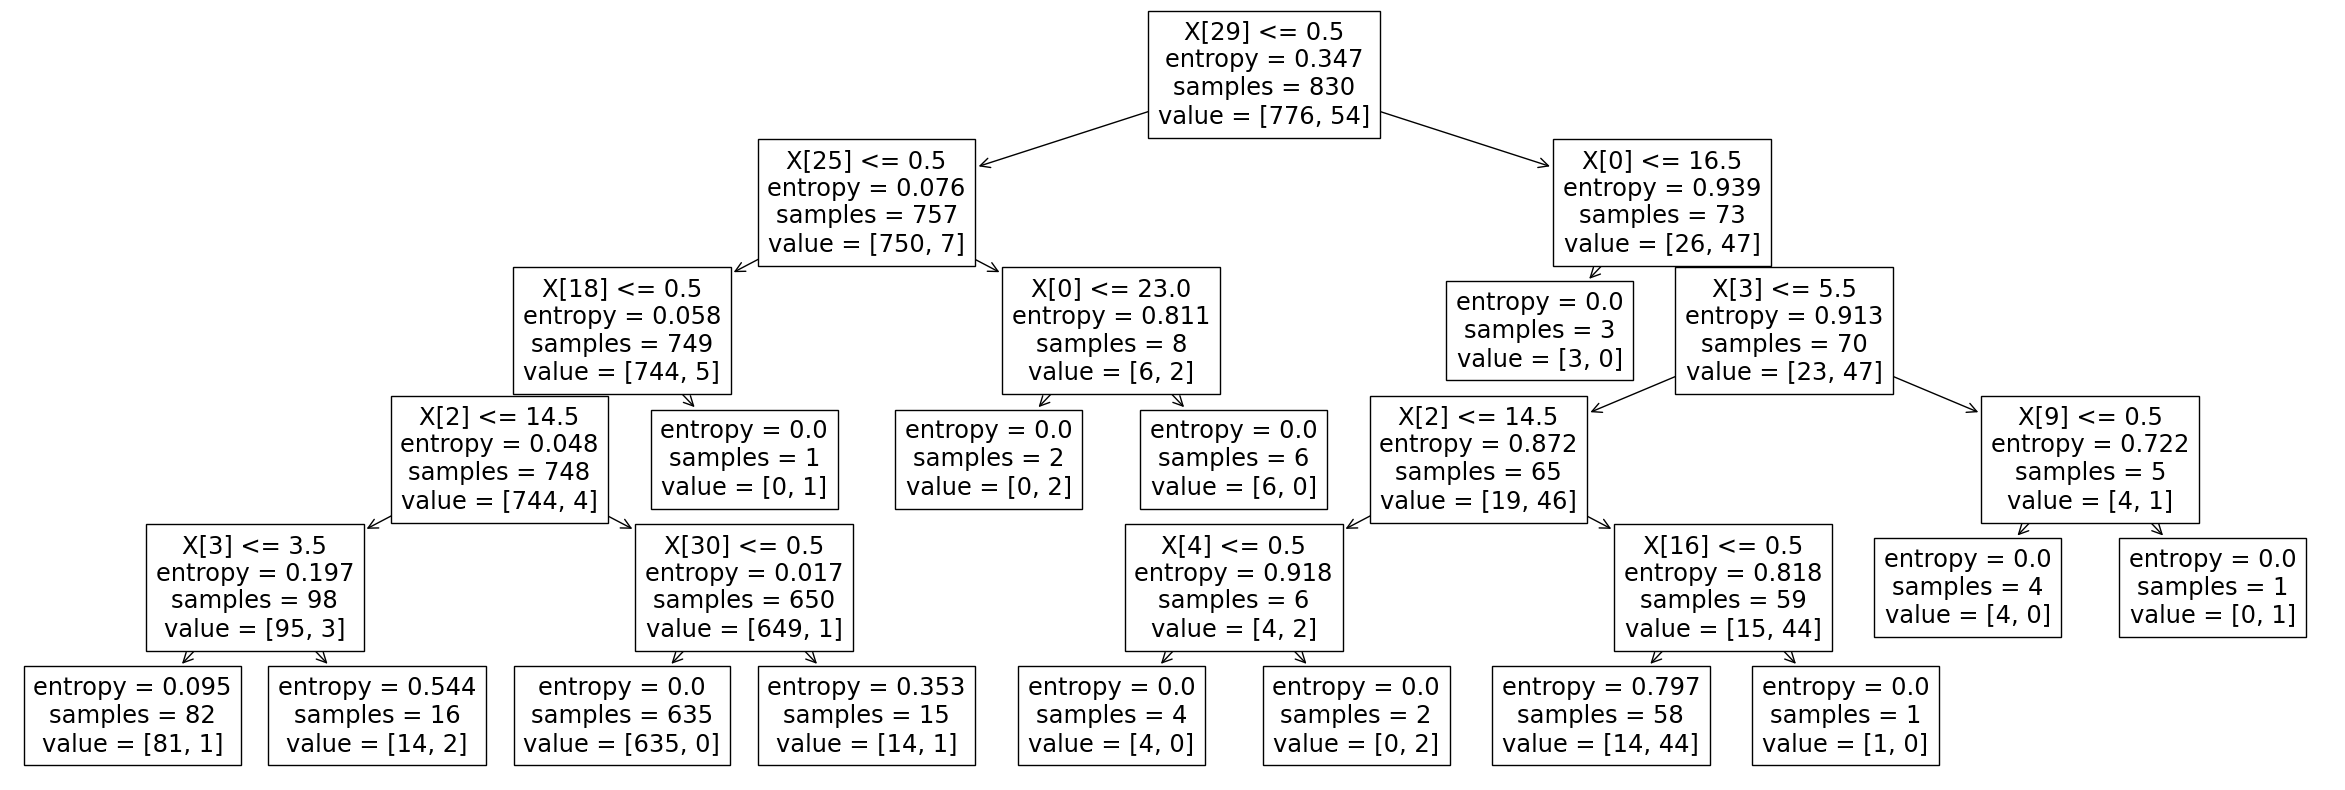

In [7]:
tree.plot_tree(clf1)
plt.show()

In [8]:
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=10)
clf2.fit(X=dataset2, y=y_dataset2)
prediction_dataset2 = clf2.predict(X=dataset2)

print("accuracy = ", accuracy_score(y_dataset2, prediction_dataset2))
print("precision = ", precision_score(y_dataset2, prediction_dataset2, average="macro"))

print("recall = ", recall_score(y_dataset2, prediction_dataset2, average="macro"))
print("f1_score = ", f1_score(y_dataset2, prediction_dataset2, average="macro"))

accuracy =  0.9891150023663038
precision =  0.9858397119988815
recall =  0.9814324552038229
f1_score =  0.9836243313668538


In [9]:
pickle.dump(clf2, open('../models/Data2/sklearn/Model.pkl', 'wb'))

In [10]:
plt.rcParams["figure.figsize"] = (150,80)
tree.plot_tree(clf2, fontsize=20)
plt.show()

In [11]:
clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf3.fit(X=dataset3, y=y_dataset3)
prediction_dataset3 = clf3.predict(X=dataset3)

print("accuracy = ", accuracy_score(y_dataset3, prediction_dataset3))
print("precision = ", precision_score(y_dataset3, prediction_dataset3))

print("recall = ", recall_score(y_dataset3, prediction_dataset3))
print("f1_score = ", f1_score(y_dataset3, prediction_dataset3))

accuracy =  0.9157761802992034
precision =  0.6360046457607433
recall =  0.5902134080620823
f1_score =  0.6122540250447227


In [12]:
pickle.dump(clf3, open('../models/Data3/sklearn/Model.pkl', 'wb'))

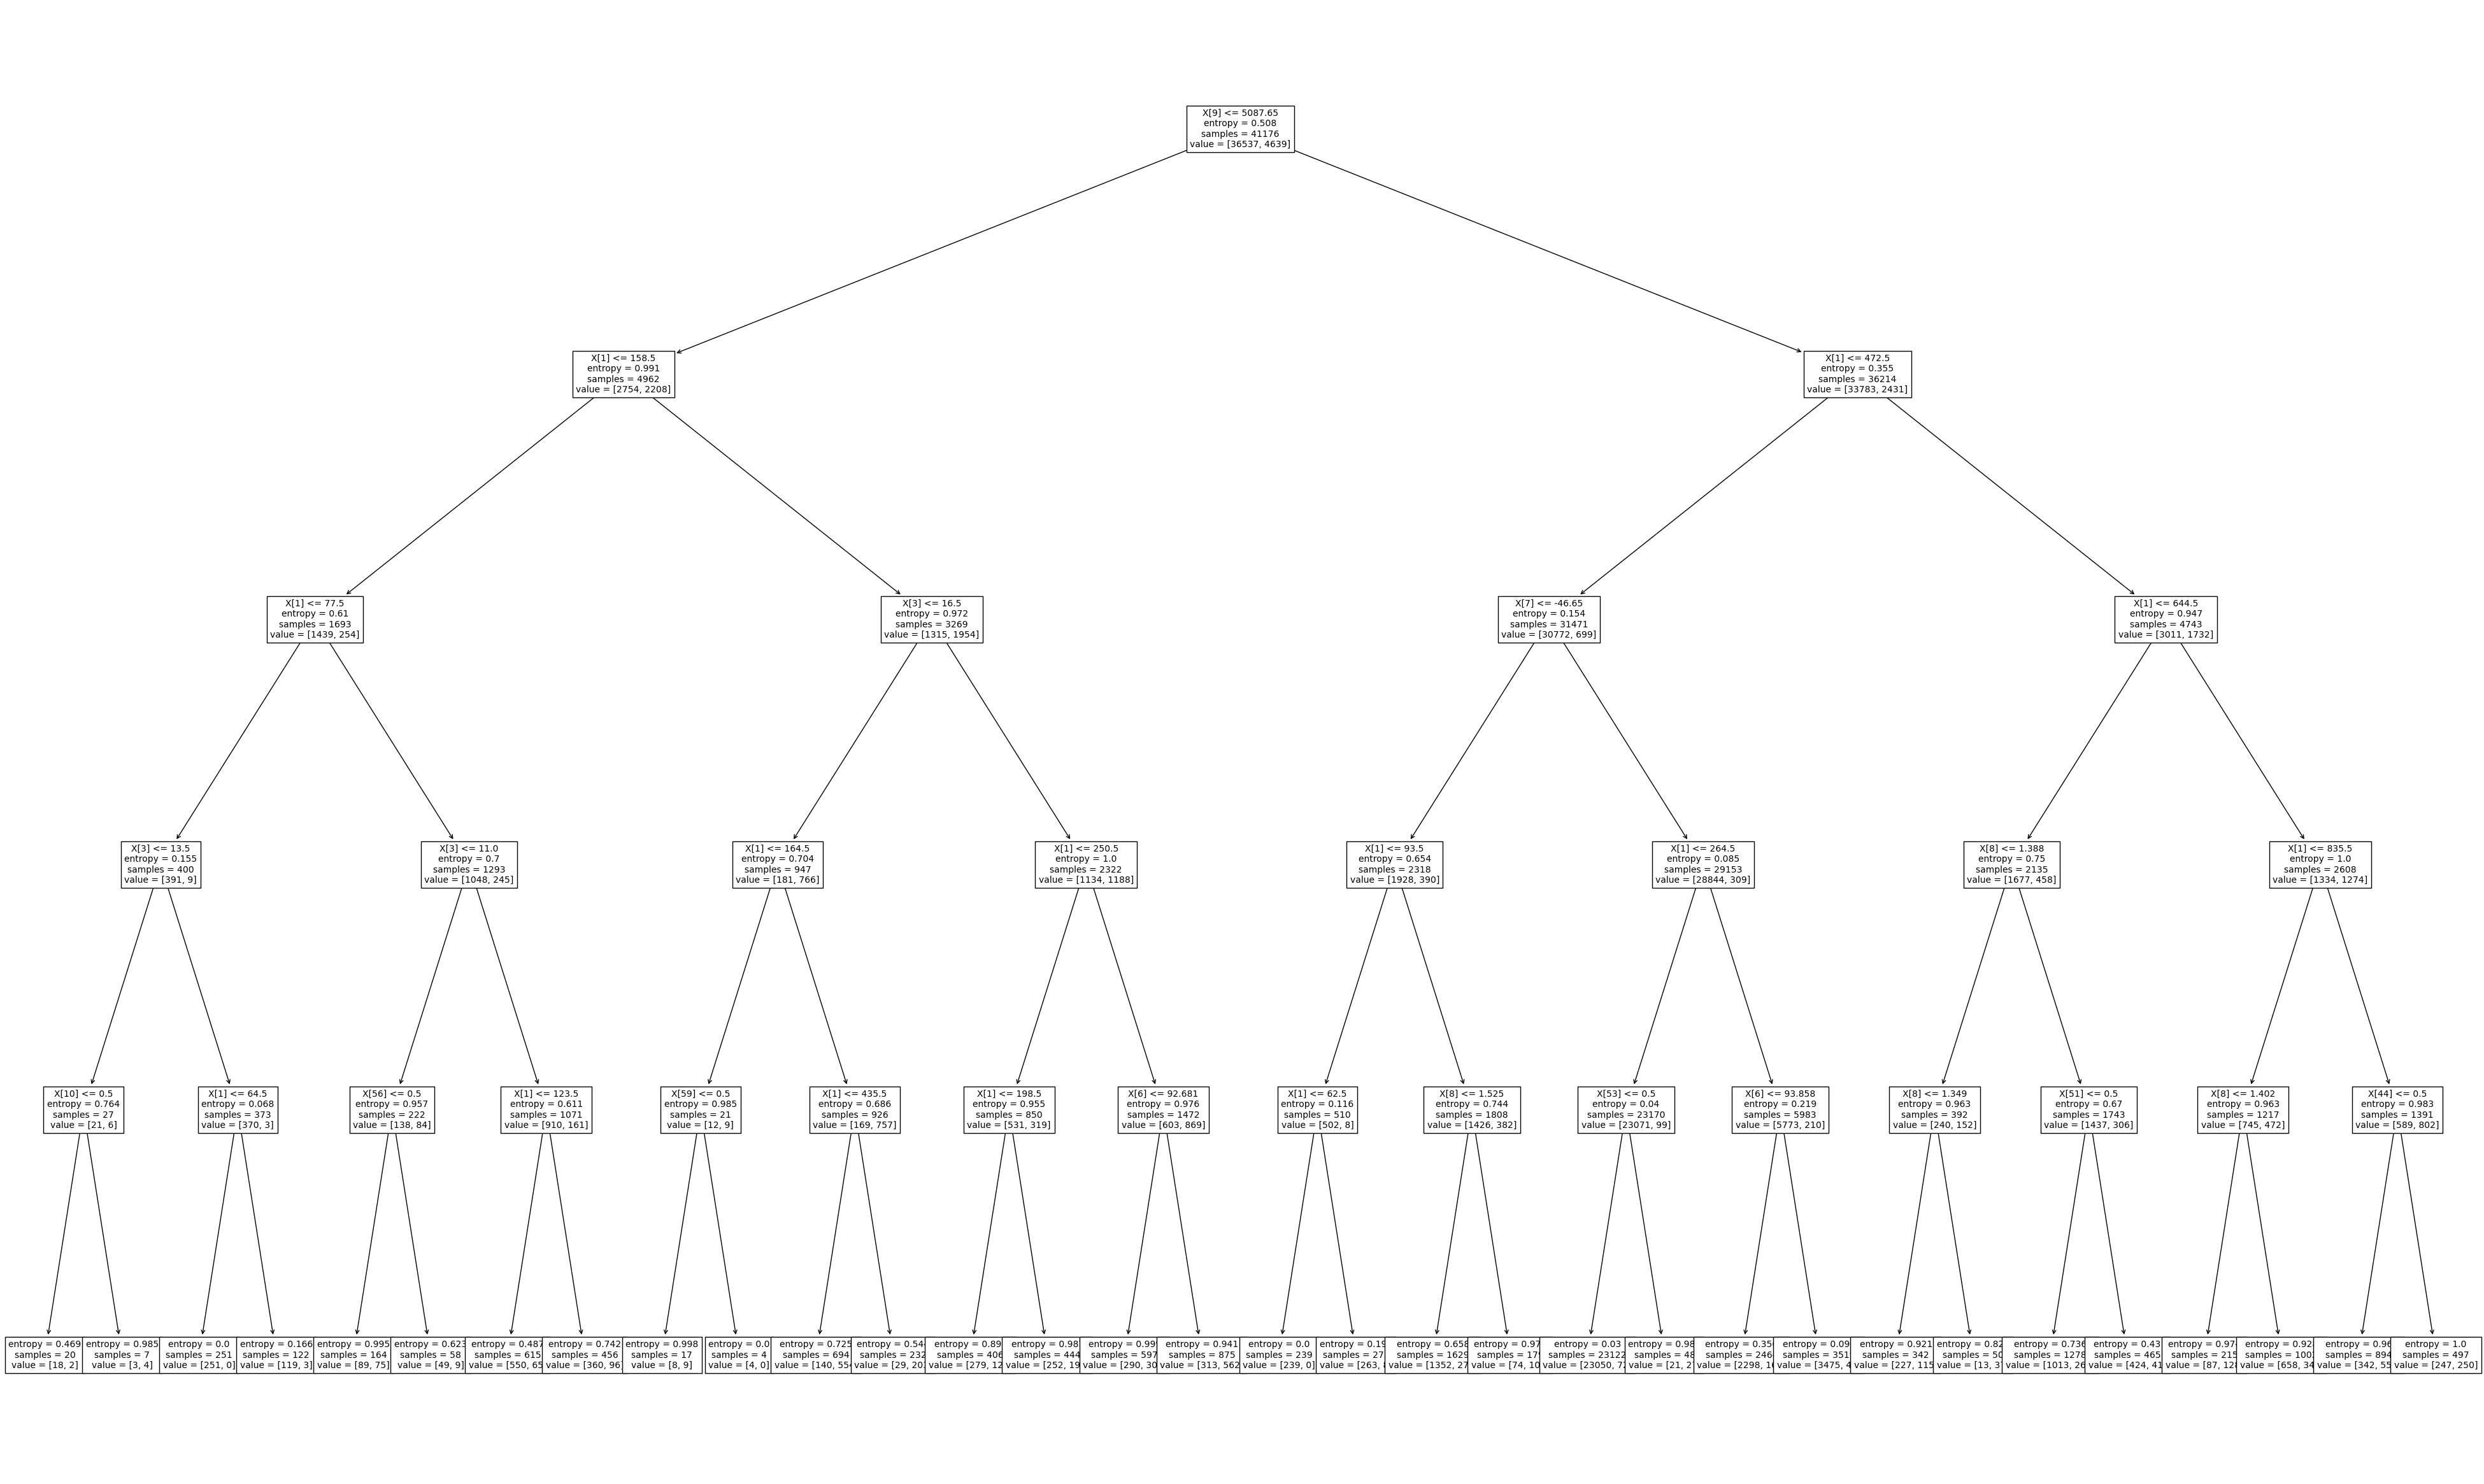

In [13]:
plt.rcParams["figure.figsize"] = (50,30)
tree.plot_tree(clf3, fontsize=10)
plt.show()